In [7]:
!pip install catboost
!pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [10]:
df = pd.read_csv('data/stud.csv')

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
x = df.drop(columns=['math_score'],axis=1)

In [14]:
y=df['math_score']

In [16]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [17]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [18]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
        
    ]
)

In [19]:
print("Categories in 'gender' variabble:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variabble:     ",end=" " )
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variabble:     ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variabble:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variabble:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variabble:      ['female' 'male']
Categories in 'race/ethnicity' variabble:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variabble:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variabble:      ['standard' 'free/reduced']
Categories in 'test preparation course' variabble:      ['none' 'completed']


In [20]:
x = preprocessor.fit_transform(x)

In [21]:
x.shape

(1000, 19)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [24]:
def eval_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False)
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = eval_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = eval_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('------------------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- Root Mean Squared Error: 5.3231
- R2 Score: 0.8743
------------------------------------------
Model performance for Test set
- Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- Root Mean Squared Error: 5.3940
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- Root Mean Squared Error: 6.5938
- R2 Score: 0.8071
------------------------------------------
Model performance for Test set
- Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- Root Mean Squared Error: 6.5197
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- Root Mean Squared Error: 5.3233
- R2 Score: 0.8743
------------------------------------------
Model performance for Test set
- Mean Squared Error: 29.0563
- Mean Absolute Error: 4.2111
- Root Mean Sq

In [28]:
pd.DataFrame(list(zip(model_list,r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.850244
6,AdaBoost Regressor,0.850150
7,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,Decision Tree Regressor,0.754991


In [30]:
lin_model = LinearRegression(fit_intercept=True)
line_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted Values')

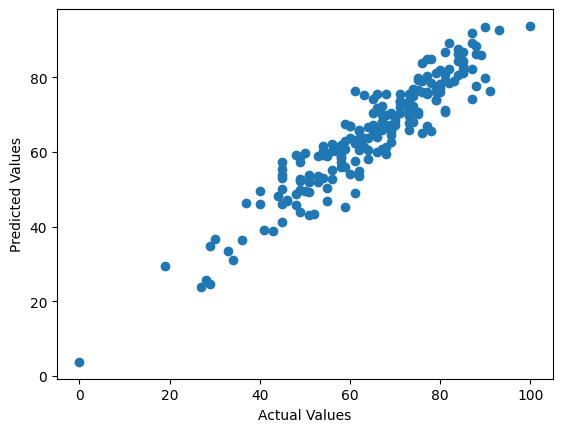

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

<Axes: xlabel='math_score'>

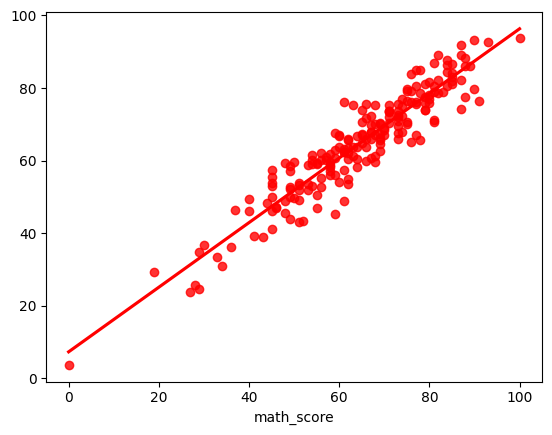

In [32]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [33]:
pred_df=pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
